In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
#star_wars.columns
star_wars = star_wars[pd.notnull(star_wars["RespondentID"]) == True]
yes_no = {
    "Yes" : True,
    "No" : False
}
yes_no2 = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

character_rankings = {
    "Unfamiliar (N/A)": np.nan,
    "Very unfavorably": 1,
    "Somewhat unfavorably": 2,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat favorably": 4,
    "Very favorably": 5
}

new_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6",
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." : "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2 D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(yes_no2)
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(character_rankings)
star_wars = star_wars.rename(columns = new_names)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


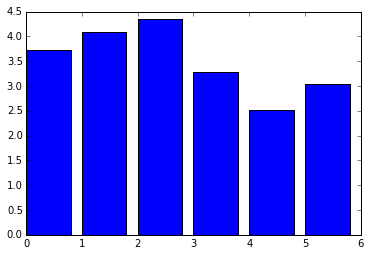

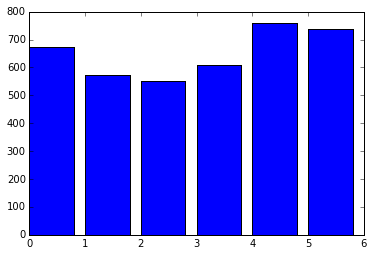

In [4]:
means_list = star_wars[star_wars.columns[9:15]].mean()
print(means_list)
plt.bar(range(6), means_list)
plt.show()
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt.show()

So far I have cleaned up the data set and renamed columns to have a more meaningful name. I have discarded rows with an unknown respondent ID, converted the rankings from strings to floating point numbers, and changed the seen variables from Yes or No strings to True or False. Additionally I have created bar charts to compare the ratings of each movie and how many people have seen each movie. I think the results for these are as they are since more people like the original trilogy than the prequel trilogy. It makes sense that viewership decreased throughout the prequel trilogy as people got less interested in watching the movies as time went on since they did not like them as much. 

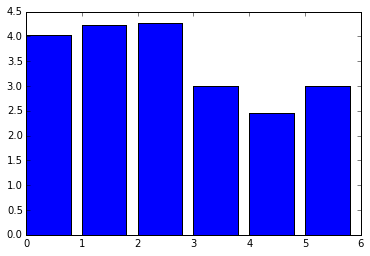

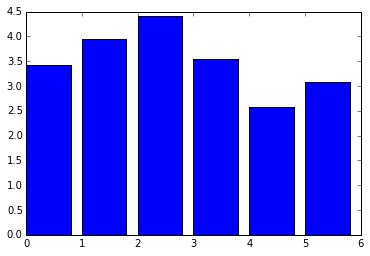

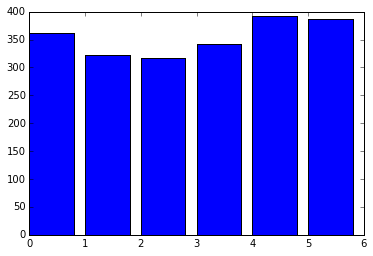

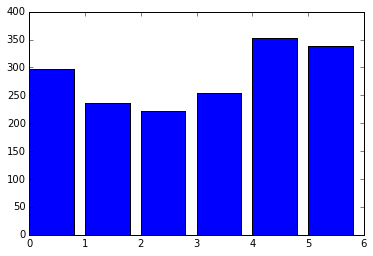

In [5]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()
plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

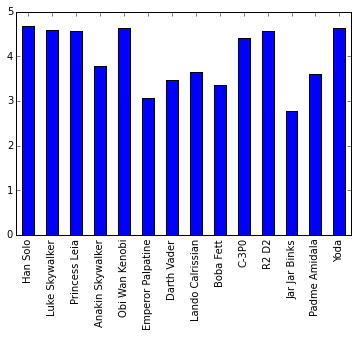

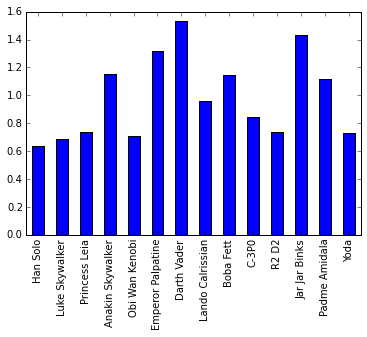

Han Solo
Jar Jar Binks
Darth Vader


In [14]:
character_rankings = star_wars[star_wars.columns[15:29]].mean()
character_controversy = star_wars[star_wars.columns[15:29]].std()
character_rankings.plot(kind='bar')
plt.show()
character_controversy.plot(kind='bar')
plt.show()
print(character_rankings[character_rankings == character_rankings.max()].index[0])
print(character_rankings[character_rankings == character_rankings.min()].index[0])
print(character_controversy[character_controversy == character_controversy.max()].index[0])